# Data Collecting

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
SUV=pd.read_csv(r'C:\Users\Dell\Desktop\SUV.csv')
SUV.head()

,ID,Gender,Age,EstimatedSalary,Purchesed
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Analysis

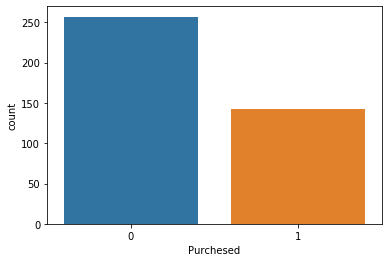

In [45]:
sns.countplot(x=SUV['Purchesed'])

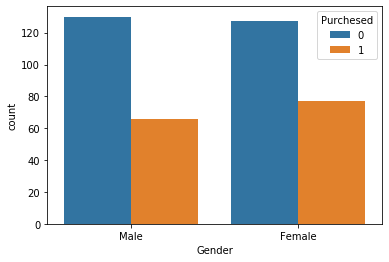

In [46]:
sns.countplot(x=SUV['Gender'],hue=SUV['Purchesed'])

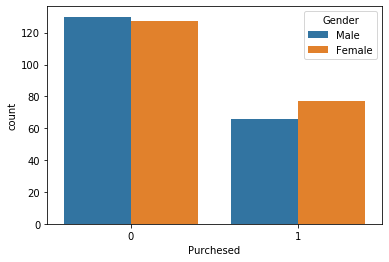

In [47]:
sns.countplot(x=SUV['Purchesed'],hue=SUV['Gender'])

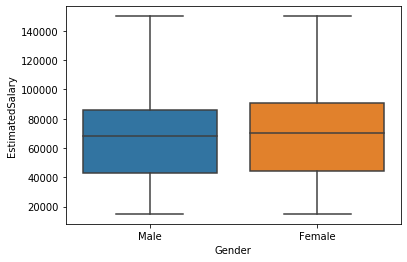

In [48]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=SUV)

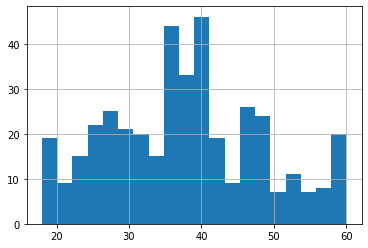

In [49]:
SUV['Age'].hist(bins=20)

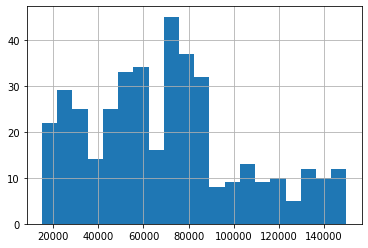

In [50]:
SUV['EstimatedSalary'].hist(bins=20)

# Data Wrangling

In [51]:
SUV.isnull().head()

,ID,Gender,Age,EstimatedSalary,Purchesed
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [52]:
SUV.isnull().sum()

ID                 0
Gender             0
Age                0
EstimatedSalary    0
Purchesed          0
dtype: int64

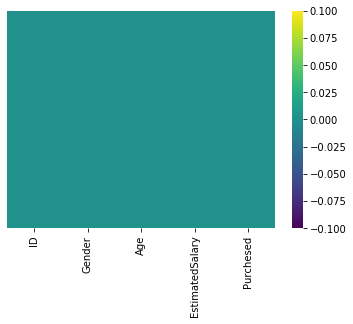

In [53]:
sns.heatmap(SUV.isnull(), yticklabels=False,cmap="viridis")

In [54]:
Gender=pd.get_dummies(SUV['Gender'],drop_first=True)
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [55]:
SUV=pd.concat([SUV,Gender],axis=1)
SUV.dropna(inplace=True)
SUV.drop(['ID','Gender'],axis=1,inplace=True)

In [56]:
SUV.head()

,Age,EstimatedSalary,Purchesed,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# Train and Test

In [57]:
X=SUV.drop('Purchesed',axis=1)
Y=SUV['Purchesed'].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
predictions=log_reg.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[74,  5],
       [ 8, 33]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

89.16666666666667